In [481]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler



In [482]:
data = pd.read_csv('Dataset/Dataset.csv')
data

,qa_center_x,a_center_y,snake_center_x,snake_center_y,a_up,a_right,a_down,a_left,b_up,b_right,b_down,b_left
0,364.0,273.0,483.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,364.0,273.0,476.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,364.0,273.0,469.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,364.0,273.0,462.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,364.0,273.0,455.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8225,119.0,364.0,637.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
8226,119.0,364.0,630.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
8227,119.0,364.0,623.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
8228,119.0,364.0,616.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [483]:
data_target = pd.read_csv('Dataset/Labels.csv')
data_target

,direction
0,3
1,3
2,3
3,3
4,3
...,...
8225,3
8226,3
8227,3
8228,3


In [484]:
df = pd.concat([data, data_target],axis=1)

df

,qa_center_x,a_center_y,snake_center_x,snake_center_y,a_up,a_right,a_down,a_left,b_up,b_right,b_down,b_left,direction
0,364.0,273.0,483.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,364.0,273.0,476.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,364.0,273.0,469.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,364.0,273.0,462.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,364.0,273.0,455.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,119.0,364.0,637.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3
8226,119.0,364.0,630.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3
8227,119.0,364.0,623.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3
8228,119.0,364.0,616.0,21.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,3


In [485]:
X = np.array(df.loc[:,df.columns!='direction'])
Y = np.array(df['direction'])

Y = Y.reshape(-1,1)

X.shape,Y.shape

((8230, 12), (8230, 1))

In [486]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(6584, 12)
(6584, 1)
(1646, 12)
(1646, 1)


In [489]:
model = tf.keras.models.Sequential([
    Dense(32,input_dim=12,activation="relu"),
    Dense(64,activation="relu"),
    Dense(64,activation="relu"),
    Dense(512,activation="relu"),
    Dense(64,activation="relu"),
    Dense(4,activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [490]:
history = model.fit(X_train, Y_train,epochs=80)

Epoch 1/80
206/206 [==============================] - 1s 2ms/step - loss: 0.6668 - accuracy: 0.8755
Epoch 2/80
206/206 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9535
Epoch 3/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9722
Epoch 4/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9733
Epoch 5/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9792
Epoch 6/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9763
Epoch 7/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9806
Epoch 8/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9789
Epoch 9/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9818
Epoch 10/80
206/206 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9824

In [491]:
model.evaluate(X_test,Y_test)

52/52 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9982


[0.007430114317685366, 0.9981774091720581]

In [492]:
model.save('model/weight_snake.h5')

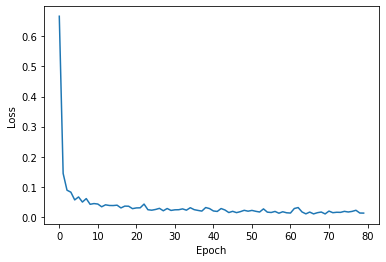

In [493]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

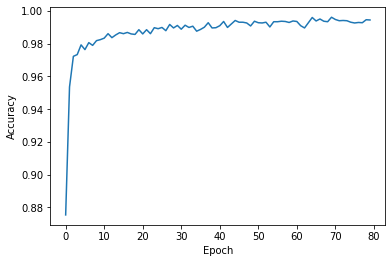

In [494]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()